In [1]:
from transformers import GPT2LMHeadModel

/opt/miniconda3/envs/llmlearn/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
model = GPT2LMHeadModel.from_pretrained("gpt2")
sd = model.state_dict()
# weights from huggingface implemented gpt2 
for k,v in sd.items():
    print(f"{k}-->{v.shape}")

transformer.wte.weight-->torch.Size([50257, 768])
transformer.wpe.weight-->torch.Size([1024, 768])
transformer.h.0.ln_1.weight-->torch.Size([768])
transformer.h.0.ln_1.bias-->torch.Size([768])
transformer.h.0.attn.c_attn.weight-->torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias-->torch.Size([2304])
transformer.h.0.attn.c_proj.weight-->torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias-->torch.Size([768])
transformer.h.0.ln_2.weight-->torch.Size([768])
transformer.h.0.ln_2.bias-->torch.Size([768])
transformer.h.0.mlp.c_fc.weight-->torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias-->torch.Size([3072])
transformer.h.0.mlp.c_proj.weight-->torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias-->torch.Size([768])
transformer.h.1.ln_1.weight-->torch.Size([768])
transformer.h.1.ln_1.bias-->torch.Size([768])
transformer.h.1.attn.c_attn.weight-->torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias-->torch.Size([2304])
transformer.h.1.attn.c_proj.weight-->torch.Size([768, 7

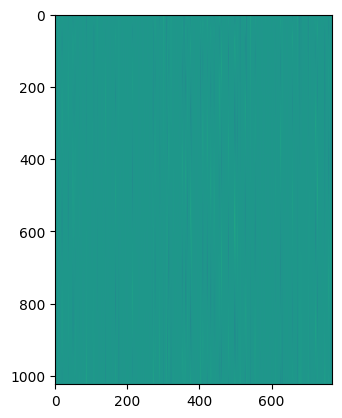

In [5]:
import matplotlib.pyplot as plt

plt.imshow(sd["transformer.wpe.weight"])

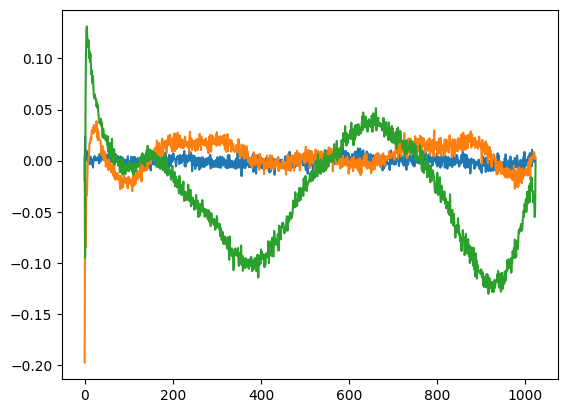

In [11]:
# 打印前几列
plt.plot(sd["transformer.wpe.weight"][:,0])
plt.plot(sd["transformer.wpe.weight"][:,1]) 
plt.plot(sd["transformer.wpe.weight"][:,2]) 

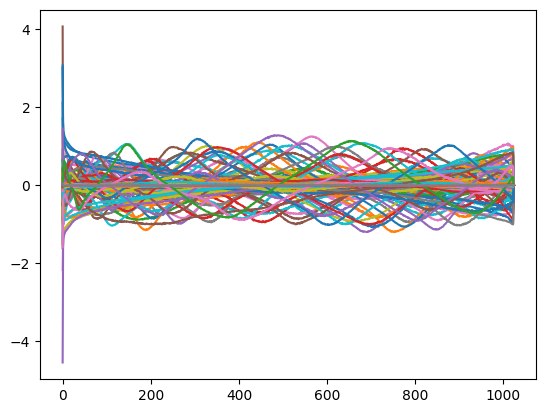

In [12]:
# 打印所有列
plt.plot(sd["transformer.wpe.weight"]) 

学习到的Position embedding 参数的每一列都像是正余弦曲线

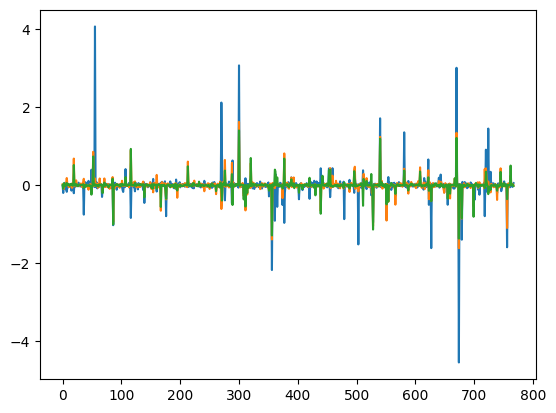

In [16]:
# 打印前几行
plt.plot(sd["transformer.wpe.weight"][0])
plt.plot(sd["transformer.wpe.weight"][1])
plt.plot(sd["transformer.wpe.weight"][2])


In [17]:
from transformers import pipeline, set_seed

generator = pipeline("text-generation", model="gpt2")
set_seed(233)
generator("hello, language model", max_length=30, num_return_sequences=5)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "hello, language model\n\nIt's a good thing that I'm not talking about this, but as the host to an episode of the show I"},
 {'generated_text': 'hello, language model for building a language-based Web interface. A programming language is a unit test for the idea of how the language is expressed in'},
 {'generated_text': "hello, language model. I want to see it in a 3d-game!\n\nThe 3D model is used when I'm playing in"},
 {'generated_text': 'hello, language model\n\nLanguage learning is hard. It is really hard. Some people are too timid for that, others feel that the language has'},
 {'generated_text': 'hello, language model [20:15] <daniel-matt> yes i thought that in a couple of other areas, such as learning'}]